In [67]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo 
from scipy import stats
from scipy.stats import zscore, norm
import matplotlib.pyplot as plt
import seaborn as sns   
from sklearn.preprocessing import LabelEncoder
import plotly.express as px


In [68]:
# Setting the options to display maximum rows and columns in the output
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [69]:
# !pip install ucimlrepo

##### Step 1 --> load the data and understood it

In [70]:
# fetch dataset 
individual_household_electric_power_consumption = fetch_ucirepo(id=235) 
  
# data (as pandas dataframes) 
X = individual_household_electric_power_consumption.data.features 
y = individual_household_electric_power_consumption.data.targets 
  
# metadata 
print(individual_household_electric_power_consumption.metadata) 
  
# variable information 
print(individual_household_electric_power_consumption.variables) 


c:\python_VSC\GUVI_Projects\guvi_projects_env\Lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


{'uci_id': 235, 'name': 'Individual Household Electric Power Consumption', 'repository_url': 'https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption', 'data_url': 'https://archive.ics.uci.edu/static/public/235/data.csv', 'abstract': 'Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.', 'area': 'Physics and Chemistry', 'tasks': ['Regression', 'Clustering'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 2075259, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2006, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C58K54', 'creators': ['Georges Hebrail', 'Alice Berard'], 'intro_paper': None, 'additional_info': {'summary': 'This archiv

In [71]:
X.head(2)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0


In [72]:
df = pd.concat([X, y], axis=1)  # change to X later

In [73]:
df.head(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [74]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [76]:
print('initial size of the data :', df.shape)

initial size of the data : (2075259, 9)


In [77]:
# Conclussion from Step 1:
# The dataset has 2075259 rows and 7 columns. The dataset has missing values in 'Sub_metering_3' column. 
# The dataset has 7 columns, 6 of which are features and 1 is the target variable. The target variable is 'Global_active_power'. 
# The dataset has 6 features, all of which are numerical.
# Dataset contains 47 months data from (December 2006 – November 2010).


##### Step 2 --> handle the values in the dataset

In [78]:
for i in df.columns:
    print(f'unique values in {i} column')
    print(df[i].unique())
    print('-'*70)

unique values in Date column
['16/12/2006' '17/12/2006' '18/12/2006' ... '24/11/2010' '25/11/2010'
 '26/11/2010']
----------------------------------------------------------------------
unique values in Time column
['17:24:00' '17:25:00' '17:26:00' ... '17:21:00' '17:22:00' '17:23:00']
----------------------------------------------------------------------
unique values in Global_active_power column
['4.216' '5.360' '5.374' ... 4.068 3.94 3.74]
----------------------------------------------------------------------
unique values in Global_reactive_power column
['0.418' '0.436' '0.498' '0.502' '0.528' '0.522' '0.520' '0.510' '0.470'
 '0.478' '0.398' '0.422' '0.282' '0.152' '0.156' '0.000' '0.076' '0.090'
 '0.200' '0.058' '0.180' '0.144' '0.118' '0.108' '0.202' '0.192' '0.186'
 '0.116' '0.136' '0.148' '0.160' '0.158' '0.100' '0.082' '0.050' '0.052'
 '0.162' '0.086' '0.048' '0.054' '0.068' '0.166' '0.174' '0.178' '0.188'
 '0.088' '0.080' '0.070' '0.084' '0.074' '0.106' '0.092' '0.064' '0.046

In [79]:
rows_with_question_mark = df[df.isin(['?']).any(axis=1)]
rows_with_question_mark.to_csv("rows_with_question_mark.csv", index=False)

In [80]:
# the dataset contains '?' values , so need to handle it before changing the datatype of the columns.
df = df.replace('?', None)

In [81]:
# Conclussion from Step 2: The dataset contains '?' values, handled it by replced the '?' values with None.

##### Step 3 --> handle data type

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [83]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [84]:
# Function to convert the datatype to float
def change_dtype_float(df,column_name):
    try:
        df[column_name]=df[column_name].astype(float)
        print(f"the datatype of the '{column_name}' column is changed to float successfully")
    except Exception as e:
        print("Error occured when changing the datatype to float of column",column_name,":",e)

In [85]:
columns_to_change_dtype = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for col in columns_to_change_dtype:
    change_dtype_float(df,col)

the datatype of the 'Global_active_power' column is changed to float successfully
the datatype of the 'Global_reactive_power' column is changed to float successfully
the datatype of the 'Voltage' column is changed to float successfully
the datatype of the 'Global_intensity' column is changed to float successfully
the datatype of the 'Sub_metering_1' column is changed to float successfully
the datatype of the 'Sub_metering_2' column is changed to float successfully
the datatype of the 'Sub_metering_3' column is changed to float successfully


In [86]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df.drop(['Time','Date'], axis=1, inplace=True)

In [87]:
df.head(2)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   Datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [89]:
# Conclussion from Step 3: Successfully changed the datatype of the columns to float and datetime.

##### Step 4 --> Handle Null Values

In [90]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
Datetime                     0
dtype: int64

In [91]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [92]:
print('size of the data after dropping null values:', df.shape)

size of the data after dropping null values: (2049280, 8)


In [93]:
# Conclusion from Step 4: Removed the rows with missing values.

##### Step 5 --> Handle Duplicate Values

In [94]:
df.duplicated().sum()   

np.int64(0)

In [95]:
# conclusion from step 5 - There are no duplicate rows in the dataset.

##### Step 6 --> Detect Outliers

In [96]:
numerical_cols = df.drop('Datetime', axis=1)

In [97]:
# for col in numerical_cols:
#     fig = px.box(df, y=col, title=f'Boxplot of {col}')
#     fig.show()

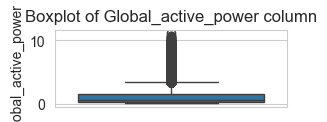

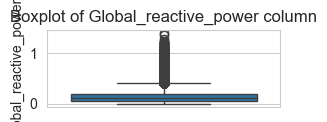

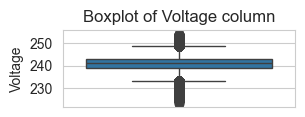

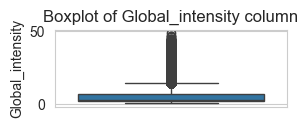

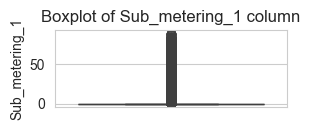

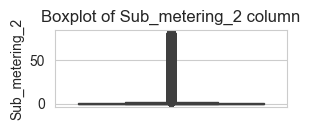

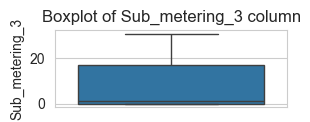

In [98]:
for i in numerical_cols:
    plt.figure(figsize=(3, 1))
    sns.boxplot(data=df[i])
    plt.title(f"Boxplot of {i} column")
    plt.show()

In [99]:
# detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

outlier_df = []
for col in numerical_cols:
    outliers = detect_outliers_iqr(df, col)
    outlier_df.append({'col' : col, 'outliers_count' : len(outliers)})
        
pd.DataFrame(outlier_df)

,col,outliers_count
0,Global_active_power,94907
1,Global_reactive_power,40420
2,Voltage,51067
3,Global_intensity,100961
4,Sub_metering_1,169105
5,Sub_metering_2,77151
6,Sub_metering_3,0


In [100]:
# Function to calculate Z-score bounds and outlier counts
def detect_outliers_zscore(df, columns, threshold=3):
    outlier_stats = []
    for col in columns:
        z_scores = zscore(df[col])
        outliers = (abs(z_scores) > threshold).sum()
        outlier_stats.append({'col': col,'outliers_count': outliers})
    
    return pd.DataFrame(outlier_stats)

outlier_zscore_stats = detect_outliers_zscore(df, numerical_cols)
outlier_zscore_stats

,col,outliers_count
0,Global_active_power,36160
1,Global_reactive_power,24480
2,Voltage,12759
3,Global_intensity,37434
4,Sub_metering_1,56097
5,Sub_metering_2,50993
6,Sub_metering_3,0


In [101]:
# Conclusion from Step 6: The dataset contains outliers. Outliers are detected using Boxplot, IQR and Z-score methods. 
# Eventhough the dataset contains outliers, we are not removing the outliers as the dataset is time series data.

##### Step 7 --> Skew & Kurtosis

In [102]:
# detect outliers using skew/kurtosis method
for column in numerical_cols:
    if df[column].skew() < 0.5 and df[column].skew() > -0.5 and df[column].kurtosis() < 3 and df[column].kurtosis() > -3:
        continue
    print(f'Skewness of the {column} : ',df[column].skew())
    print(f'Kurtosis of the {column} : ',df[column].kurtosis())
    print("-----------------------------------------")

Skewness of the Global_active_power :  1.7862333920915965
Kurtosis of the Global_active_power :  4.218685087072209
-----------------------------------------
Skewness of the Global_reactive_power :  1.2619141974704149
Kurtosis of the Global_reactive_power :  2.6056327677496105
-----------------------------------------
Skewness of the Global_intensity :  1.8490999040716398
Kurtosis of the Global_intensity :  4.601242858337602
-----------------------------------------
Skewness of the Sub_metering_1 :  5.944541281563981
Kurtosis of the Sub_metering_1 :  35.642992681719356
-----------------------------------------
Skewness of the Sub_metering_2 :  7.0905532303433985
Kurtosis of the Sub_metering_2 :  57.90734360431289
-----------------------------------------
Skewness of the Sub_metering_3 :  0.7246883225039495
Kurtosis of the Sub_metering_3 :  -1.2821975312784255
-----------------------------------------


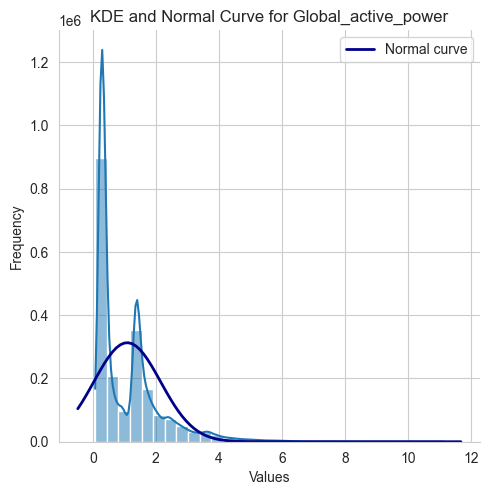

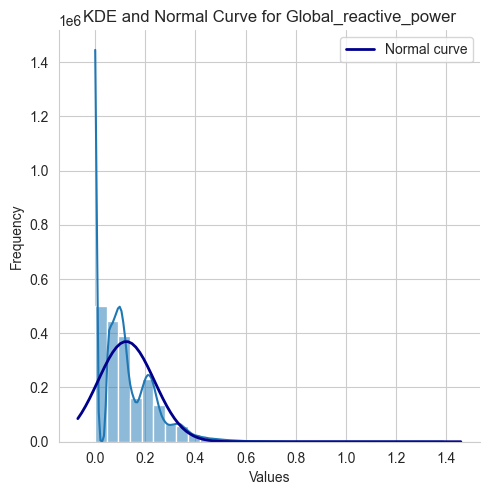

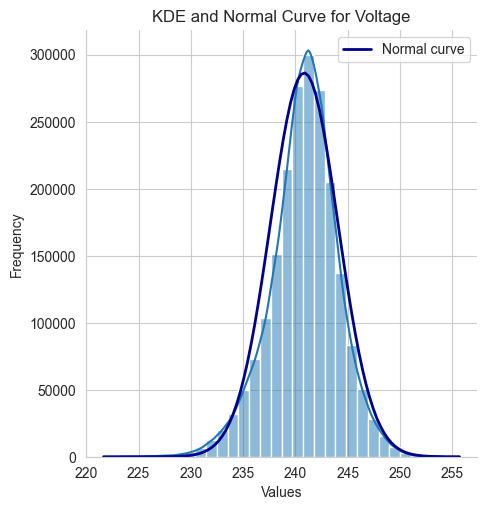

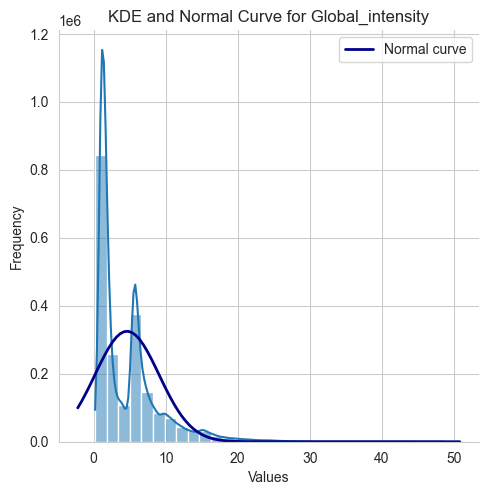

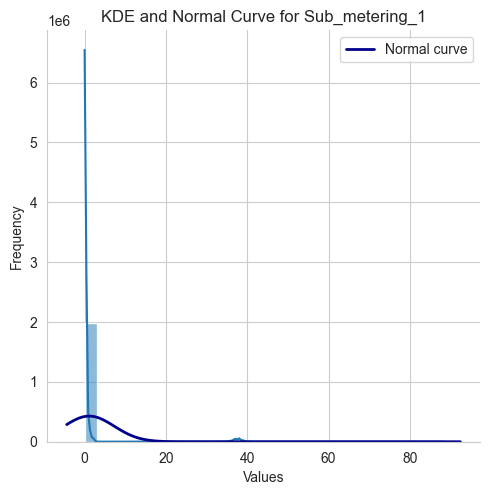

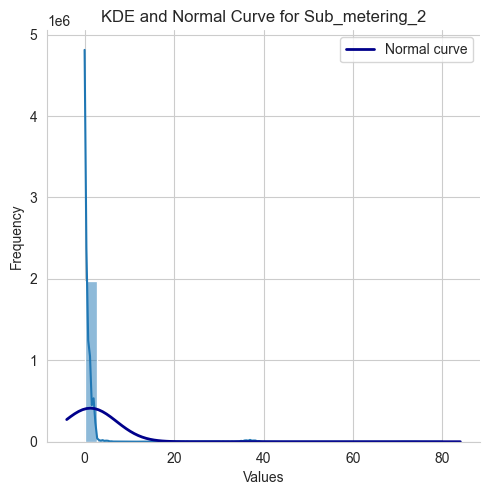

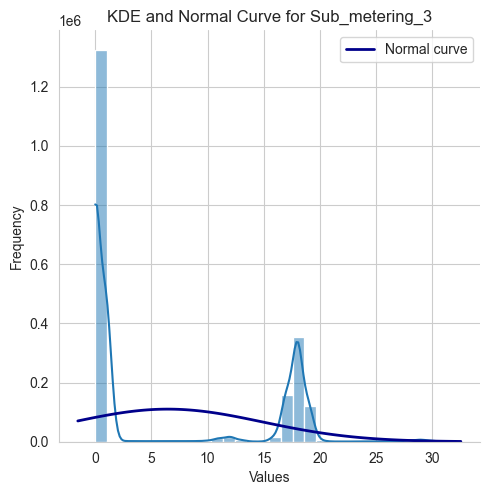

In [103]:
for col in numerical_cols:
    sns.displot(df[col], kde=True, bins=30)
    mu, sigma = norm.fit(df[col])
    xmin, xmax = plt.xlim()  
    x = np.linspace(xmin, xmax, 100)
    pdf = norm.pdf(x, mu, sigma)  
 
    plt.plot(x, pdf * len(df[col]) * (xmax - xmin) / 30, color='darkblue', lw=2, label='Normal curve')
    plt.title(f'KDE and Normal Curve for {col}')
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()
 

##### Step - 8 --> Feature Engineering

In [104]:
df['Hour'] = df['Datetime'].dt.hour
df['DayOfWeek'] = df['Datetime'].dt.dayofweek
df['Month'] = df['Datetime'].dt.month
df['WeekOfYear'] = df['Datetime'].dt.isocalendar().week
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x > 5 else 0)


In [105]:
# peak hours (e.g., 6 AM - 10 AM, 6 PM - 10 PM)
peak_hours = list(range(6,11)) + list(range(18,24))
df['IsPeakHour'] = df['Hour'].apply(lambda x: 1 if x in peak_hours else 0)

In [106]:
df['Daily_Consumption'] = df.groupby(df['Datetime'].dt.date)['Global_active_power'].transform(lambda x: x.sum() * (1/60))

In [107]:
# Compute total sub-metered energy
df['Unmetered_Energy'] = df['Global_active_power'] * 1000 / 60 - df['Sub_metering_1'] - df['Sub_metering_2'] + df['Sub_metering_3']

In [108]:
df['Short_Term_Avg_Power'] = df['Global_active_power'].rolling(window=10, min_periods=1).mean()
df['Hourly_Avg_Power'] = df['Global_active_power'].rolling(window=60, min_periods=1).mean()
df['Daily_Avg_Power'] = df['Global_active_power'].rolling(window=1440, min_periods=1).mean()


df['Power_Deviation_10min'] = df['Global_active_power'] - df['Short_Term_Avg_Power']
df['Power_Anomaly_Flag'] = (abs(df['Power_Deviation_10min']) > 1.5 * df['Hourly_Avg_Power']).astype(int)

In [109]:
def get_seasons(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
    
df['Season'] = df['Month'].apply(get_seasons)

In [110]:
def get_time_of_day(hour):
    if hour in range(5, 12):
        return 'Morning'
    elif hour in range(12, 17):
        return 'Afternoon'
    elif hour in range(17, 20):
        return 'Evening'
    else:
        return 'Night'
    
df['TimeOfDay'] = df['Hour'].apply(get_time_of_day)

In [111]:
df = df.drop(columns='Datetime')

In [112]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Hour', 'DayOfWeek', 'Month', 'WeekOfYear',
       'IsWeekend', 'IsPeakHour', 'Daily_Consumption', 'Unmetered_Energy',
       'Short_Term_Avg_Power', 'Hourly_Avg_Power', 'Daily_Avg_Power',
       'Power_Deviation_10min', 'Power_Anomaly_Flag', 'Season', 'TimeOfDay'],
      dtype='object')

In [113]:
# Conclusion from Step 8: Created new features like ['Hour', 'DayOfWeek', 'Month','WeekOfYear', 'IsWeekend', 'IsPeakHour', 'Daily_Consumption', 'Unmetered_Energy', 'Season', 'TimeOfDay'] from the existing features.

##### Step 9 --> EDA 

In [114]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Creating daily consumption pattern plot...


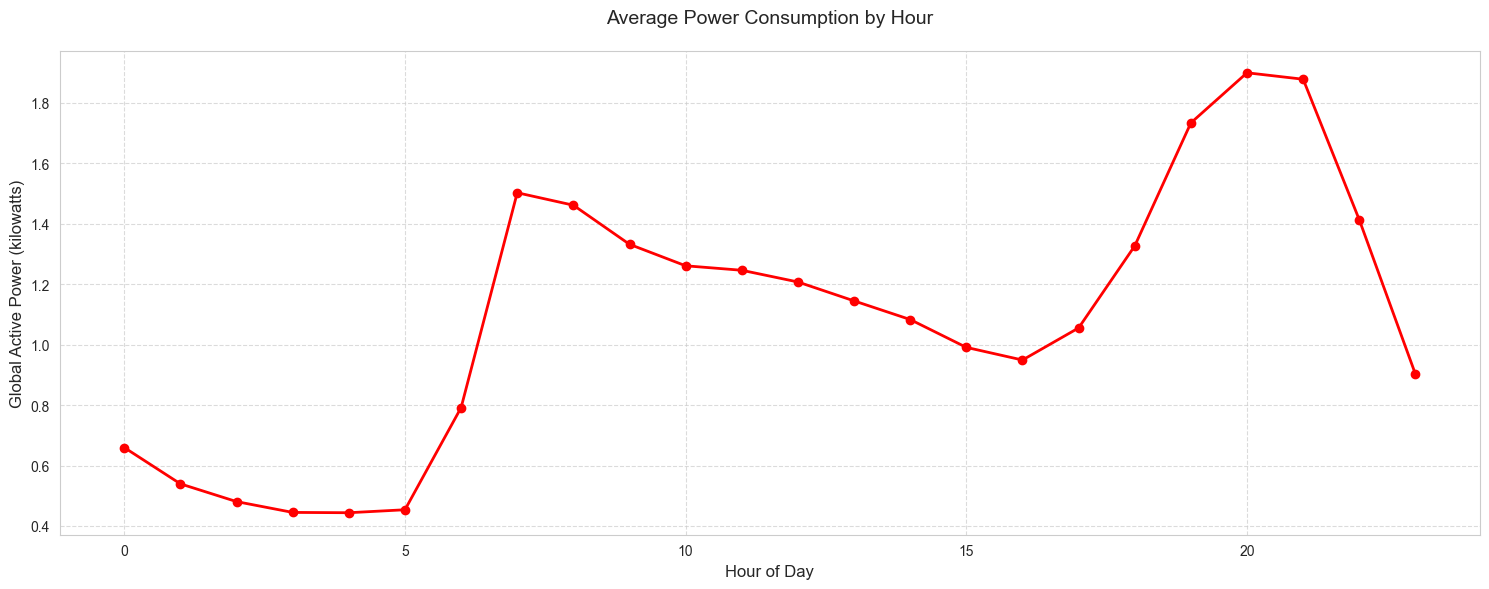

In [115]:
# Daily Consumption Pattern
print("Creating daily consumption pattern plot...")
plt.figure(figsize=(15,6))
daily_avg = df.groupby('Hour')['Global_active_power'].mean()
plt.plot(daily_avg.index, daily_avg.values, linewidth=2, marker='o', color='r')
plt.title('Average Power Consumption by Hour', fontsize=14, pad=20)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Global Active Power (kilowatts)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Creating weekly consumption pattern plot...


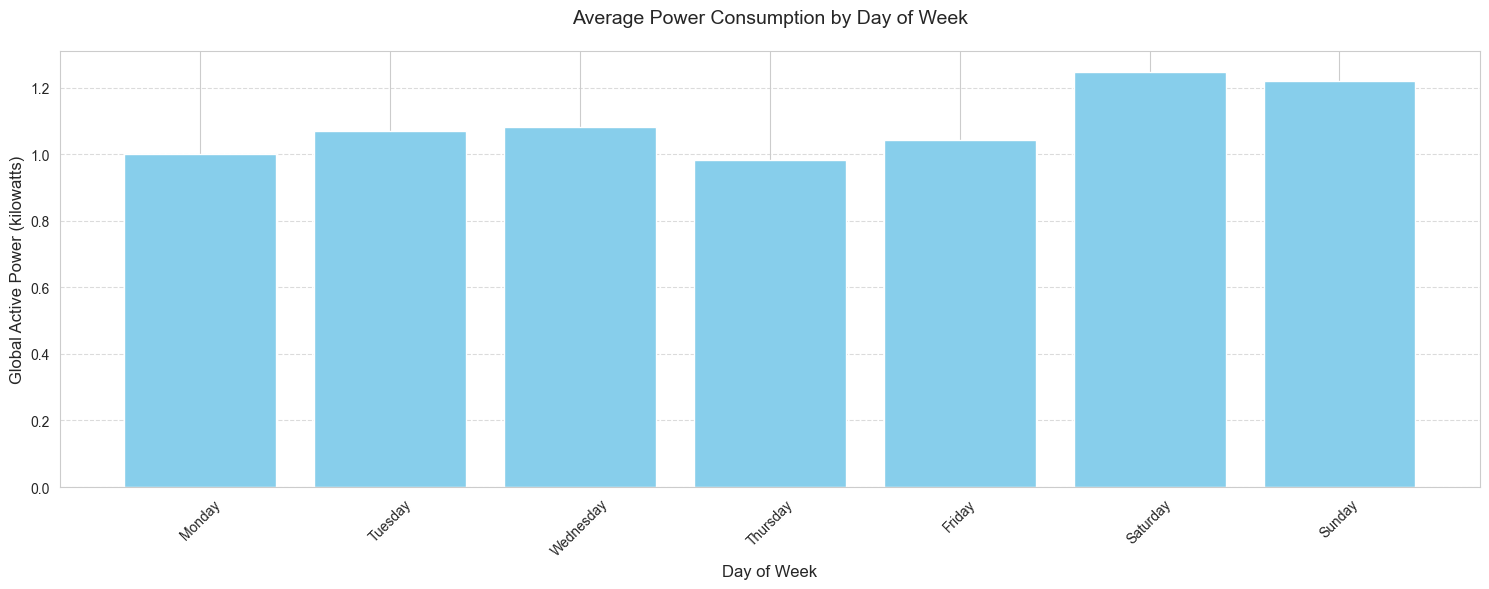

In [116]:
# Weekly Consumption Pattern
print("Creating weekly consumption pattern plot...")
plt.figure(figsize=(15,6))
weekly_avg = df.groupby('DayOfWeek')['Global_active_power'].mean()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.bar(days, weekly_avg.values, color='skyblue')
plt.title('Average Power Consumption by Day of Week', fontsize=14, pad=20)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Global Active Power (kilowatts)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
plt.tight_layout()
plt.show()

Creating Time of day consumption pattern plot...


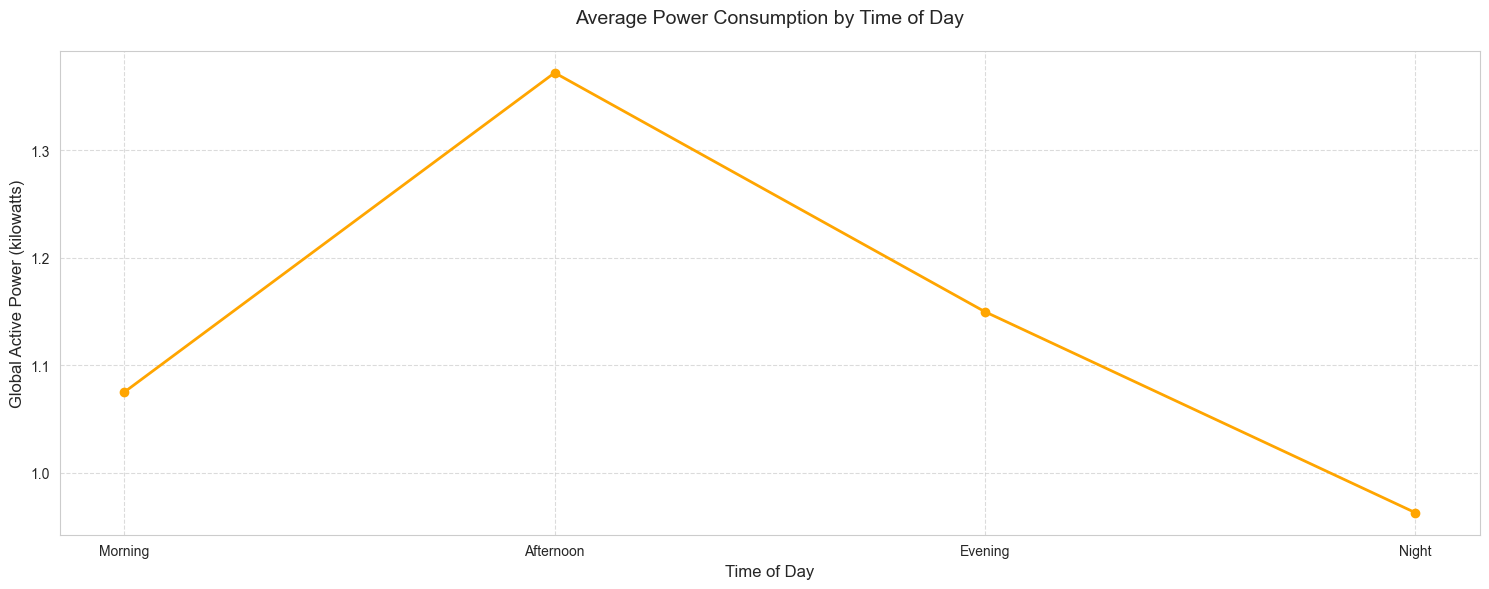

In [117]:
# Weekly Consumption Pattern
print("Creating Time of day consumption pattern plot...")
plt.figure(figsize=(15,6))
time_avg = df.groupby('TimeOfDay')['Global_active_power'].mean()
time_of_day = ['Morning', 'Afternoon', 'Evening', 'Night']
plt.plot(time_of_day, time_avg.values, marker='o', linewidth=2, color='orange')
plt.title('Average Power Consumption by Time of Day', fontsize=14, pad=20)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Global Active Power (kilowatts)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [118]:
df['TimeOfDay'].unique()

array(['Evening', 'Night', 'Morning', 'Afternoon'], dtype=object)

Creating monthly consumption pattern plot...


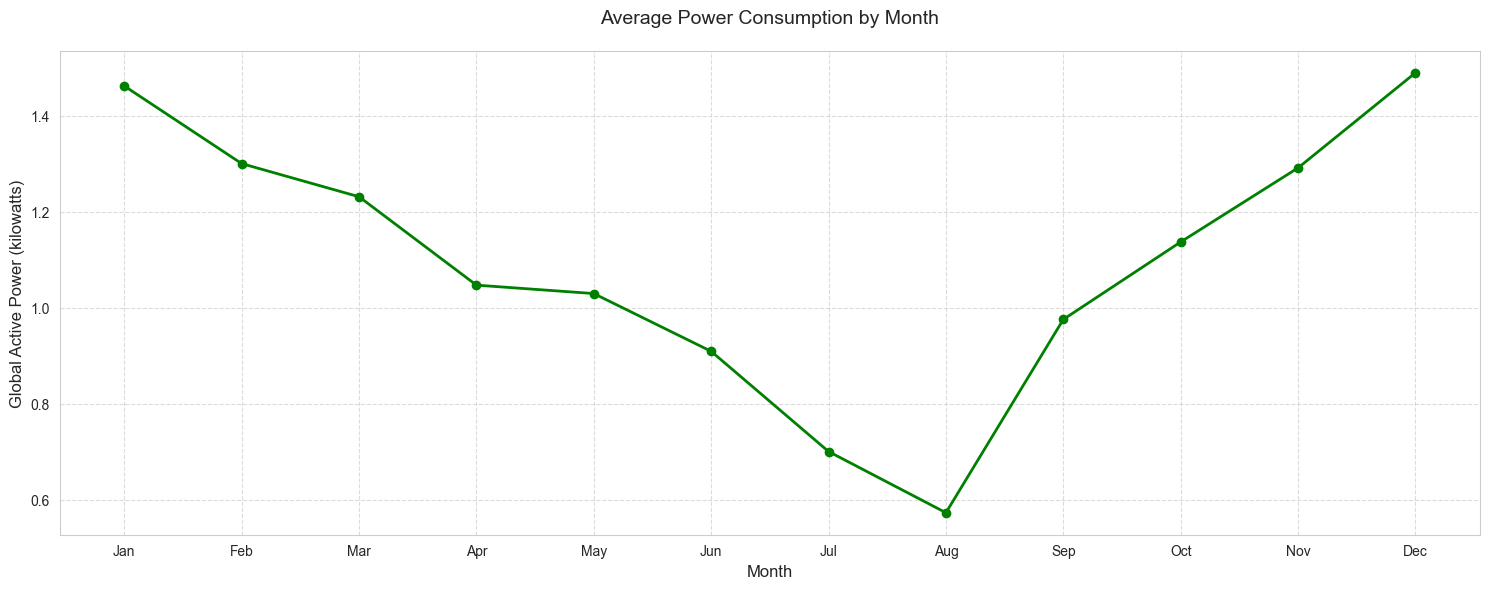

In [119]:
# Monthly Consumption Pattern
print("Creating monthly consumption pattern plot...")
plt.figure(figsize=(15,6))
monthly_avg = df.groupby('Month')['Global_active_power'].mean()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(months, monthly_avg.values, marker='o', linewidth=2, color='green')
plt.title('Average Power Consumption by Month', fontsize=14, pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Global Active Power (kilowatts)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Creating seasonal consumption pattern plot...


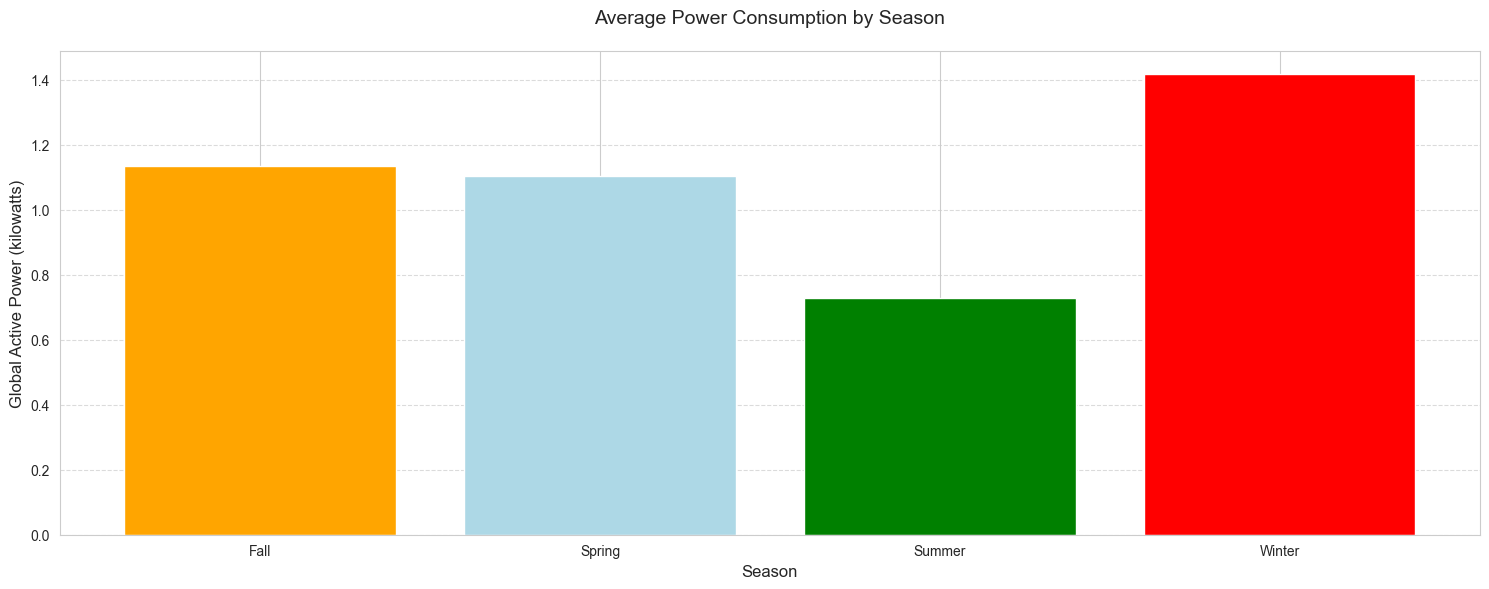

In [120]:
# Seasonal Consumption Pattern
print("Creating seasonal consumption pattern plot...")
plt.figure(figsize=(15,6))
season_avg = df.groupby('Season')['Global_active_power'].mean()
plt.bar(season_avg.index, season_avg.values, color=['orange', 'lightblue', 'green', 'red'])
plt.title('Average Power Consumption by Season', fontsize=14, pad=20)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Global Active Power (kilowatts)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
plt.tight_layout()
plt.show()

Creating peak vs. off-peak consumption plot...


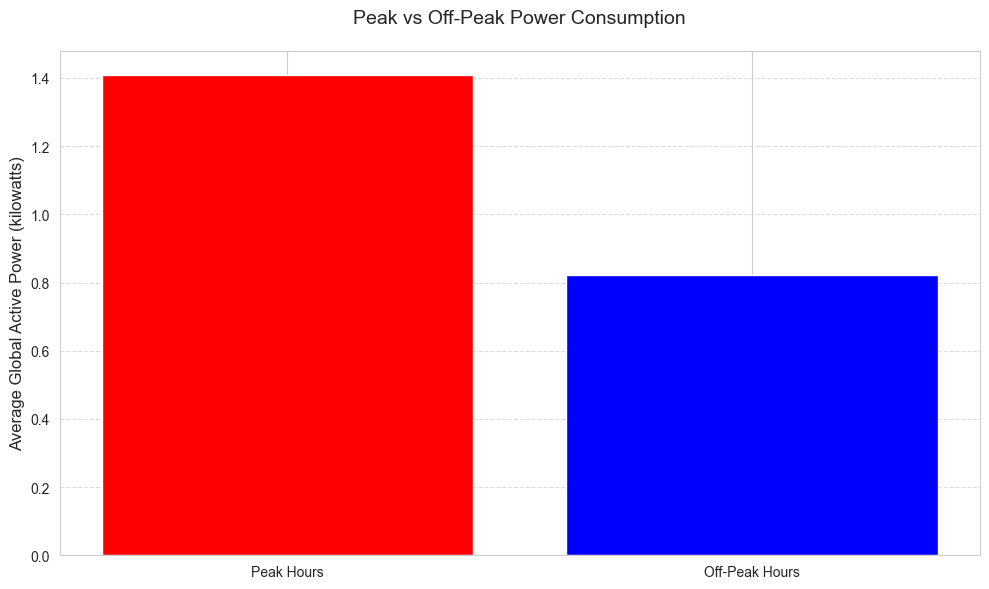


Peak vs Off-Peak Usage:
Peak Hours: 1.41 kW
Off-Peak Hours: 0.82 kW


In [121]:
# Peak vs. Off-Peak Consumption
print("Creating peak vs. off-peak consumption plot...")
plt.figure(figsize=(10,6))
peak_avg = df[df['IsPeakHour'] == 1]['Global_active_power'].mean()
offpeak_avg = df[df['IsPeakHour'] == 0]['Global_active_power'].mean()
plt.bar(['Peak Hours', 'Off-Peak Hours'], [peak_avg, offpeak_avg], color=['red', 'blue'])
plt.title('Peak vs Off-Peak Power Consumption', fontsize=14, pad=20)
plt.ylabel('Average Global Active Power (kilowatts)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
plt.tight_layout()
plt.show()

print("\nPeak vs Off-Peak Usage:")
print(f"Peak Hours: {peak_avg:.2f} kW")
print(f"Off-Peak Hours: {offpeak_avg:.2f} kW")

In [122]:
df.head(2)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Hour,DayOfWeek,Month,WeekOfYear,IsWeekend,IsPeakHour,Daily_Consumption,Unmetered_Energy,Short_Term_Avg_Power,Hourly_Avg_Power,Daily_Avg_Power,Power_Deviation_10min,Power_Anomaly_Flag,Season,TimeOfDay
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,17,5,12,50,0,0,20.152933,86.266667,4.216,4.216,4.216,0.000,0,Winter,Evening
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,17,5,12,50,0,0,20.152933,104.333333,4.788,4.788,4.788,0.572,0,Winter,Evening


In [123]:
# Conclusion from Step 9: Created the consumption patterns for ['Hour', 'DayOfWeek', 'Month', 'TimeOfDay', 'Season'] features.

##### Step --> 10  Correlation & Hypothesis testing

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
 7   Hour                   int32  
 8   DayOfWeek              int32  
 9   Month                  int32  
 10  WeekOfYear             UInt32 
 11  IsWeekend              int64  
 12  IsPeakHour             int64  
 13  Daily_Consumption      float64
 14  Unmetered_Energy       float64
 15  Short_Term_Avg_Power   float64
 16  Hourly_Avg_Power       float64
 17  Daily_Avg_Power        float64
 18  Power_Deviation_10min  float64
 19  Power_Anomaly_Flag     int64  
 20  Season                 object 
 21  TimeOfDay              object 
dtypes: UInt32(1), floa

In [125]:
# Encode categorical features
cat_cols = df.select_dtypes(include='object').columns
encoder = LabelEncoder()

encoded_mappings = {}
for i in cat_cols:
    df[i] = encoder.fit_transform(df[i])
    encoded_mappings[i] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

for col, mapping in encoded_mappings.items():
    print(f"Encoded values for '{col}':")
    for original, encoded in mapping.items():
        print(f"  {original} -> {encoded}")
    print()

Encoded values for 'Season':
  Fall -> 0
  Spring -> 1
  Summer -> 2
  Winter -> 3

Encoded values for 'TimeOfDay':
  Afternoon -> 0
  Evening -> 1
  Morning -> 2
  Night -> 3



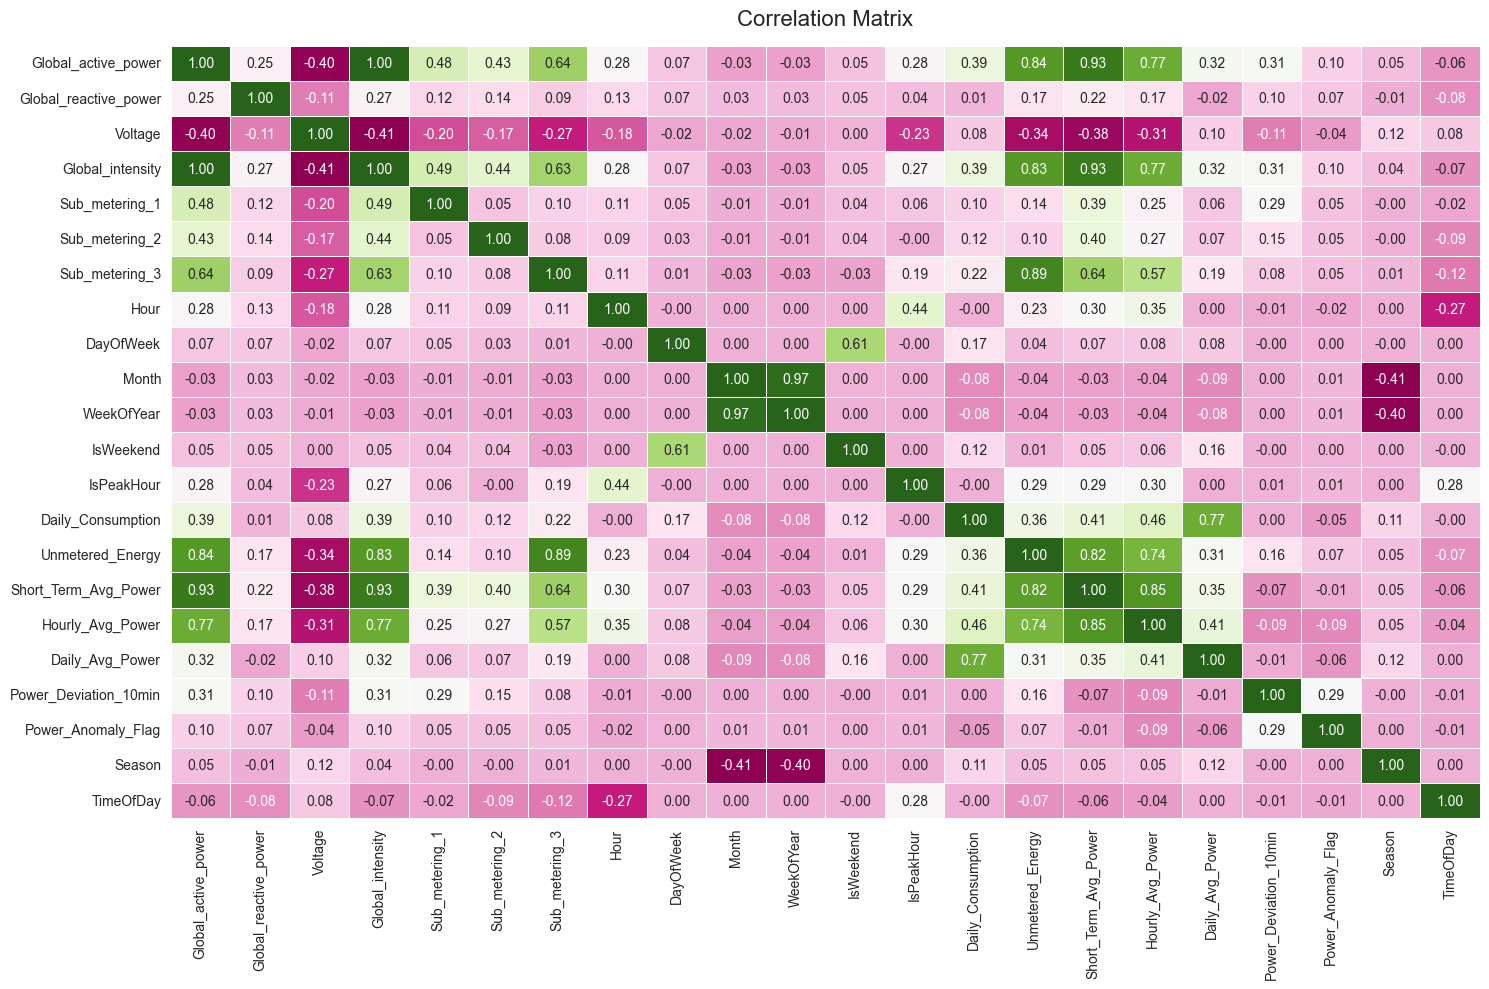

In [126]:
corr_matrix = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='PiYG', cbar=False, linewidths=0.5)
plt.title("Correlation Matrix", fontsize=16, pad=15)
plt.tight_layout()
plt.show()

In [127]:
df.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Hour,DayOfWeek,Month,WeekOfYear,IsWeekend,IsPeakHour,Daily_Consumption,Unmetered_Energy,Short_Term_Avg_Power,Hourly_Avg_Power,Daily_Avg_Power,Power_Deviation_10min,Power_Anomaly_Flag,Season,TimeOfDay
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555,0.281602,0.065813,-0.032654,-0.032467,0.049375,0.276385,0.392182,0.839521,0.929018,0.773636,0.324980,0.305520,0.096112,0.046083,-0.063295
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617,0.127892,0.069531,0.027211,0.029117,0.048179,0.038312,0.011229,0.169877,0.219074,0.168506,-0.020345,0.102254,0.069010,-0.007252,-0.077316
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172,-0.176050,-0.021412,-0.015191,-0.012499,0.002647,-0.229989,0.075197,-0.341908,-0.376479,-0.308107,0.095039,-0.109029,-0.044846,0.120535,0.076628
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543,0.281972,0.067210,-0.031417,-0.031266,0.050947,0.274958,0.385859,0.830659,0.926546,0.768905,0.318260,0.308885,0.099427,0.044296,-0.065015
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571,0.108491,0.052961,-0.007513,-0.007162,0.044451,0.063928,0.097161,0.140557,0.394719,0.253235,0.064195,0.290292,0.049871,-0.000331,-0.023767
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872,0.087210,0.031836,-0.009763,-0.009054,0.041648,-0.003115,0.119409,0.104656,0.397846,0.271264,0.070528,0.147891,0.051423,-0.000746,-0.092181
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000,0.113873,0.013536,-0.030791,-0.032317,-0.026196,0.186851,0.221673,0.891767,0.636906,0.572762,0.190223,0.082702,0.045732,0.014818,-0.122366
Hour,0.281602,0.127892,-0.176050,0.281972,0.108491,0.087210,0.113873,1.000000,-0.000303,0.000011,0.000072,0.000744,0.441609,-0.001040,0.227781,0.298725,0.350773,0.000498,-0.009463,-0.016717,0.000219,-0.273394
DayOfWeek,0.065813,0.069531,-0.021412,0.067210,0.052961,0.031836,0.013536,-0.000303,1.000000,0.000241,0.000099,0.611945,-0.000133,0.166086,0.036592,0.069100,0.078184,0.078408,-0.000373,0.003720,-0.001122,0.000662
Month,-0.032654,0.027211,-0.015191,-0.031417,-0.007513,-0.009763,-0.030791,0.000011,0.000241,1.000000,0.968718,0.004364,0.000079,-0.082771,-0.035126,-0.034220,-0.038449,-0.088315,0.000018,0.014563,-0.406854,0.000045


In [128]:
# Conclusion from Step 10: Encoded the categorical features and created the correlation matrix.

##### Step 11 --> Train the model

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import RandomizedSearchCV

In [136]:
# Split dataset into features and target
X = df.drop(columns=['Global_active_power'])
y = df['Global_active_power']

In [137]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [138]:
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [139]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet': ElasticNet(),
    'Support Vector Regression (SVR)': SVR(),
    'K-Nearest Neighbors (KNN)': KNeighborsRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'Neural Network (MLP)': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}

Linear Regression: MAE=1.2515477620039832e-15, MSE=2.5595536027098717e-30, RMSE=1.5998604947650504e-15, R^2=1.0, MAPE=2.704049298276082e-13


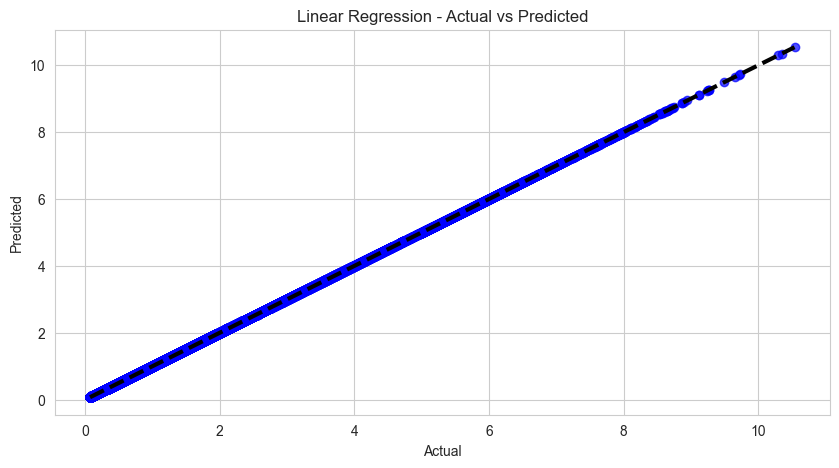

Ridge Regression: MAE=7.2727874966039375e-06, MSE=1.2807941633531827e-10, RMSE=1.1317217694085338e-05, R^2=0.9999999998860446, MAPE=0.0013127659667788684


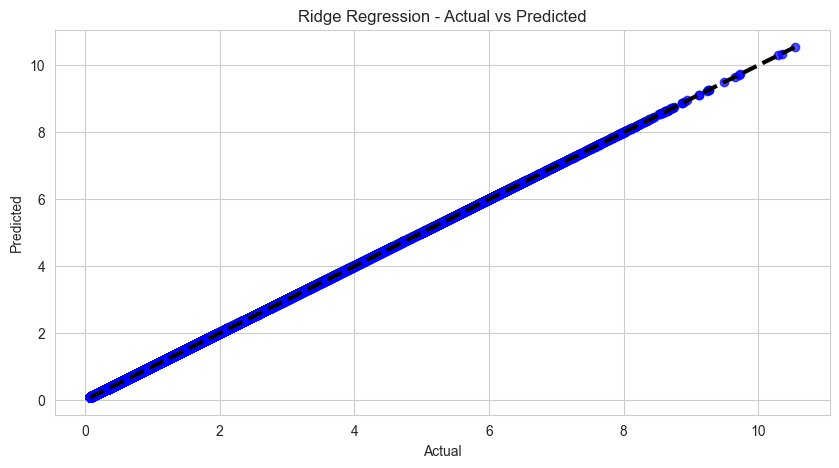

Lasso Regression: MAE=0.777187625413806, MSE=1.0093035217069295, RMSE=1.004640991452633, R^2=0.10199797592014481, MAPE=160.72421669796532


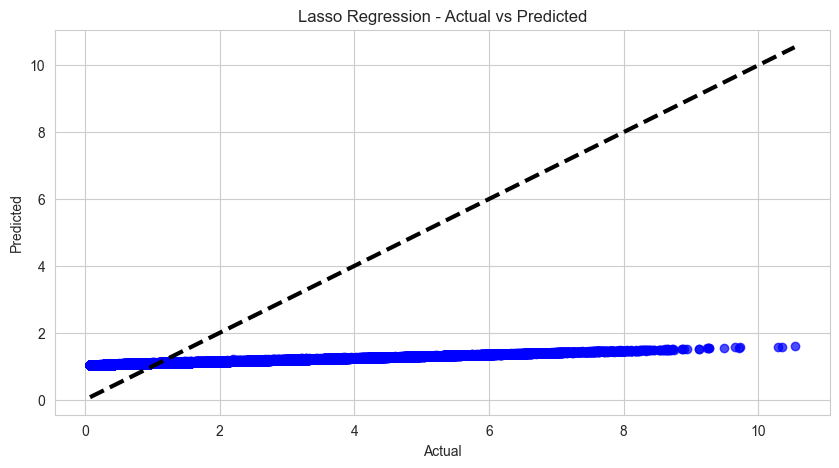

ElasticNet: MAE=0.48035999886986785, MSE=0.4072377339940137, RMSE=0.6381518110873099, R^2=0.6376706297528346, MAPE=98.91322497656489


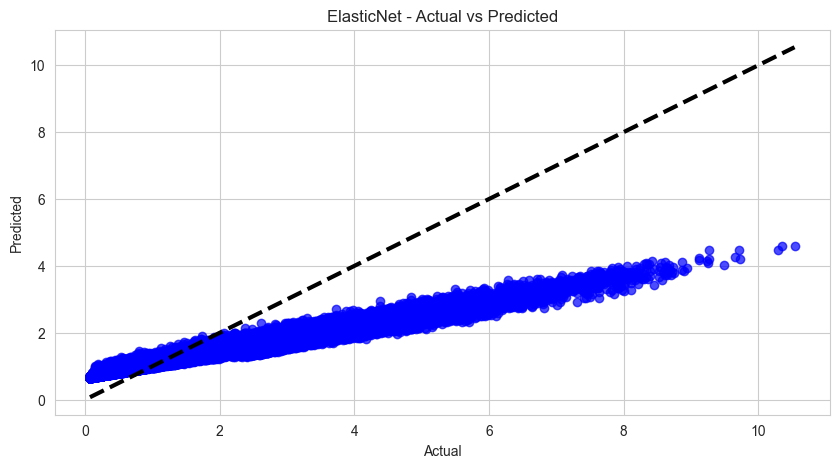

In [ ]:
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100
    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R^2': r2, 'MAPE': mape}
    print(f"{name}: MAE={mae}, MSE={mse}, RMSE={rmse}, R^2={r2}, MAPE={mape}")

    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f"{name} - Actual vs Predicted")
    plt.show()

    if hasattr(model, 'feature_importances_'):
        feature_importance = model.feature_importances_
        plt.figure(figsize=(12, 6))
        sns.barplot(x=feature_importance, y=X, palette='coolwarm', dodge=False, legend=False)
        plt.xlabel('Coefficient Value')
        plt.ylabel('Feature')
        plt.title(f'Feature Importance in {name}')
        plt.show()